In [10]:
import tensorflow as tf

In [11]:
print(tf.__version__)

2.8.2


In [12]:
# Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Get the data used in the project
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-08-02 16:32:34--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-08-02 16:32:34 (38.1 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [16]:
# Load data into dataframe
data = pd.read_csv('moore.csv', header=None).values

In [23]:
X = data[:,0].reshape(-1,1) # This makes X a two dimensional array (N, D) where D = 1
y = data[:, 1];


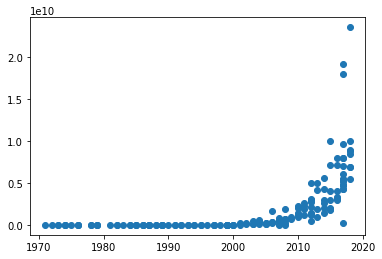

In [24]:
# Plot the data
plt.scatter(X, y)

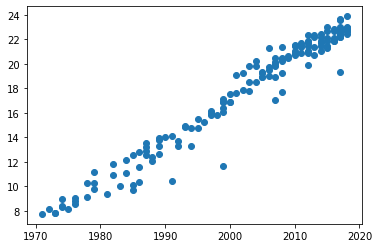

In [25]:
y = np.log(y)
plt.scatter(X, y)

In [26]:
# Preprocessing
X = X - X.mean()

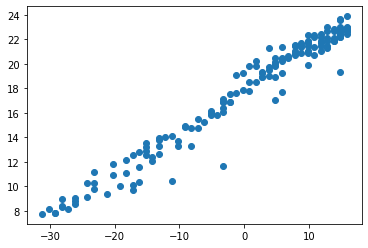

In [27]:
plt.scatter(X, y)

In [30]:
# Create Tensorflow model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

# Learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Train the model

r = model.fit(X, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 6ms/step - loss: 369.9140 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 5ms/step - loss: 499.4204 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 325.2578 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 271.6224 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 5ms/step - loss: 160.1264 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 6ms/step - loss: 127.1365 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 96.8740 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 71.6293 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 5ms/step - loss: 51.4075 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 4ms/step - loss: 39.1186 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 4ms/step - loss: 2

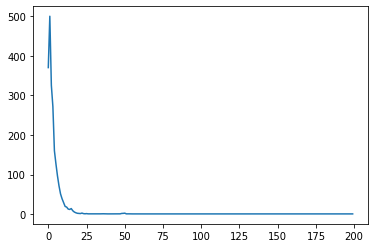

In [31]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

In [32]:
# Find the slope
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.3317818]], dtype=float32), array([17.75577], dtype=float32)]


In [34]:
a = model.layers[0].get_weights()[0][0,0]


0.3317818


In [35]:
print('Time to double:', np.log(2) / a)

Time to double: 2.089165743961771


In [38]:
# 

X = np.array(X).flatten()
y = np.array(y)
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(y) - y.mean()*X.sum()) /denominator
b = ( y.mean() * X.dot(X) - X.mean() * X.dot(y)) / denominator
print(a, b)
print('Time to double:', np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204


#Making Predictions


In [39]:
# Make predictions
p = model.predict(X_test)
print(p) # probabilities p(y = 1 | x)

NameError: ignored